## “Exploratory Data Analysis: Pizza Place Sales Performance”

In [1]:
#I need to import the libraries I would use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [6]:
orders = pd.read_csv("orders.csv", encoding="latin1")
order_details = pd.read_csv("order_details.csv", encoding="latin1")
pizzas = pd.read_csv("pizzas.csv", encoding="latin1")
pizza_types = pd.read_csv("pizza_types.csv", encoding="latin1")

In [7]:
#To verify the column names, data types and any obvious issues
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [8]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [9]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [10]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [11]:
#To show numbers of rows and columns
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [12]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [14]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [15]:
#To merge the four data_sets

df = order_details.merge(orders, on="order_id", how="left") \
                  .merge(pizzas, on="pizza_id", how="left") \
                  .merge(pizza_types, on="pizza_type_id", how="left")

df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [32]:
#To plan the analysis
df.shape

(48620, 16)

## 1. Total Revenue

Revenue = quantity × price

In [16]:
#To find the total Revenue

df["revenue"] = df["quantity"] * df["price"]

total_revenue = df["revenue"].sum()
total_revenue

np.float64(817860.0499999999)

In [17]:
#The total revenue generated during the year was $817860.0499999999

## 2. Total Quantity Sold

In [18]:
#To find the total quantity sold

df["quantity"].sum()

np.int64(49574)

## 3. Total Orders

In [19]:
#To find total orders

df["order_id"].nunique()

21350

## 4. How Many Pizza Types?

In [20]:
#To find out how many pizza types

df["pizza_type_id"].nunique()

32

## 5. Average Price

In [21]:
#To find the average price of pizza

df["price"].mean()

np.float64(16.494132044426163)

## 6. Peak Hours of Sales

In [24]:
#To find the peak hours sales

df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S")
df["hour"] = df["time"].dt.hour

## Plot of Hourly Sales

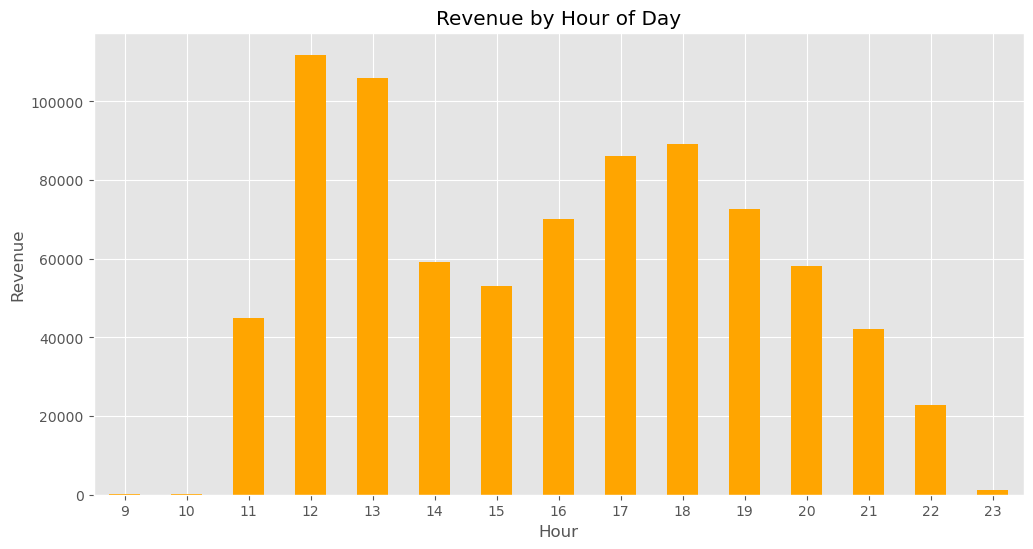

In [33]:
#Plot of hourly sales

df["hour"] = df["time"].dt.hour
hourly_sales = df.groupby("hour")["revenue"].sum()

plt.figure(figsize=(12,6))
hourly_sales.plot(kind="bar", color="orange")
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Tallest bar = peak hour,Insight:  “Revenue peaks at 12–1 PM, indicating lunch-hour demand.”

## 7. Sales by Day of Week

In [26]:
#To find Sales by Day of week

df["date"] = pd.to_datetime(df["date"])
df["day"] = df["date"].dt.day_name()

In [27]:
daily_sales = df.groupby("day")["revenue"].sum().sort_values(ascending=False)

daily_sales

day
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64

## Plot of sales By Day of Week

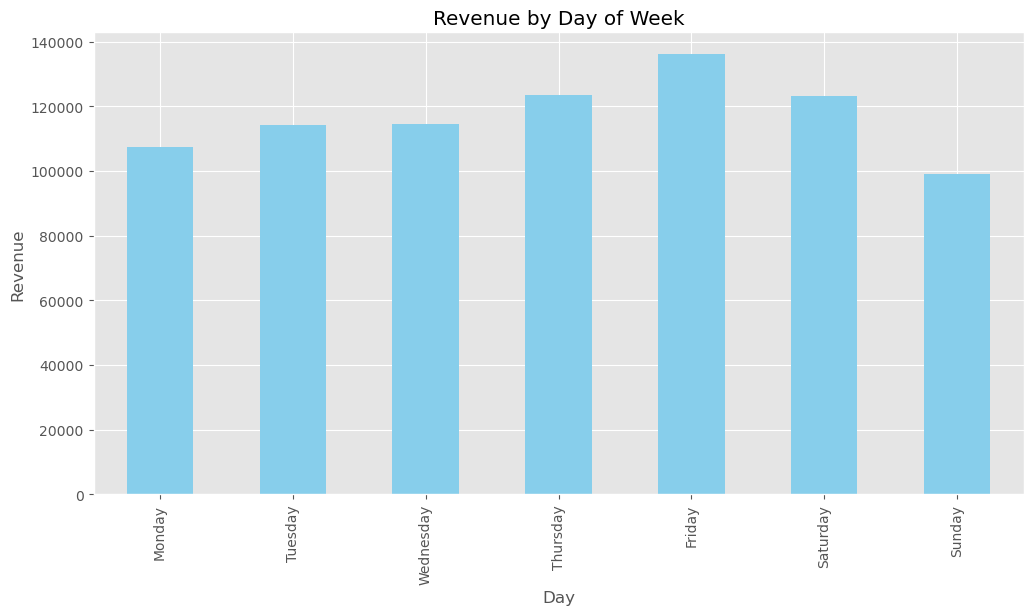

In [35]:
#Plot of sales by day of week

df["day"] = df["date"].dt.day_name()
daily_sales = df.groupby("day")["revenue"].sum().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(12,6))
daily_sales.plot(kind="bar", color="skyblue")
plt.title("Revenue by Day of Week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()

# Tallest bar = busiest dayInsight 
example: “Fridays and Saturdays generate the most revenue, suggesting high weekend demand.”

## 8. Top 5 Bestselling Pizzas

In [28]:
#To find 5 best selling pizzas

df.groupby("name")["revenue"].sum().sort_values(ascending=False).head(5)

name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: revenue, dtype: float64

# Plot of Top 5 best selling Pizzas

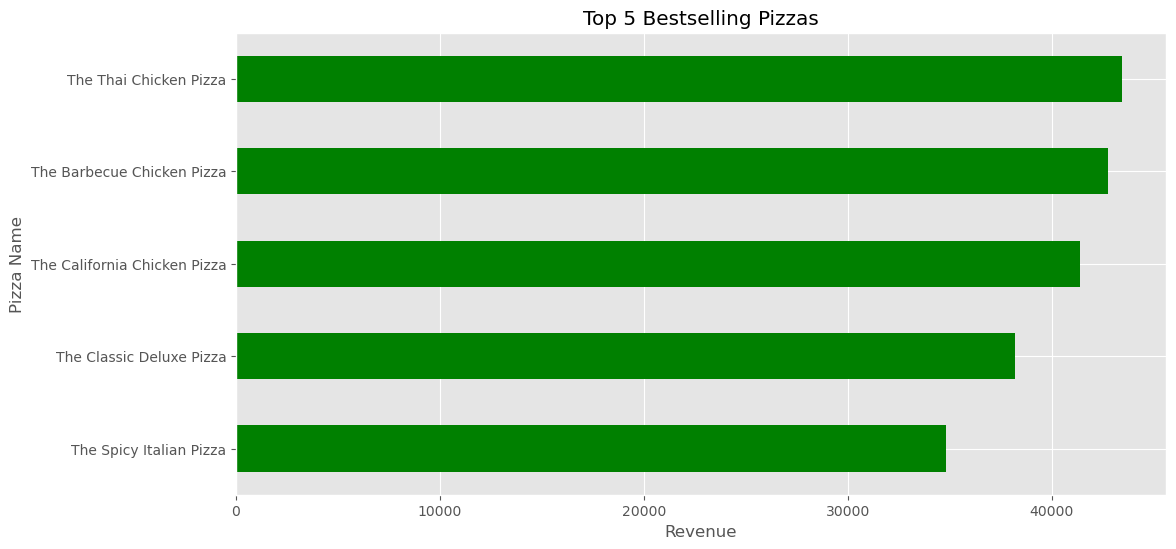

In [37]:
#Plot of Top 5 best selling Pizzas

top_pizzas = df.groupby("name")["revenue"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12,6))
top_pizzas.plot(kind="barh", color="green")
plt.title("Top 5 Bestselling Pizzas")
plt.xlabel("Revenue")
plt.ylabel("Pizza Name")
plt.gca().invert_yaxis()  # Highest at top
plt.show()

In [ ]:
#Insight: “The Thai chiken Pizza  is the top seller — consider promoting this in marketing campaigns.”

## 9. Monthly Sales Trend

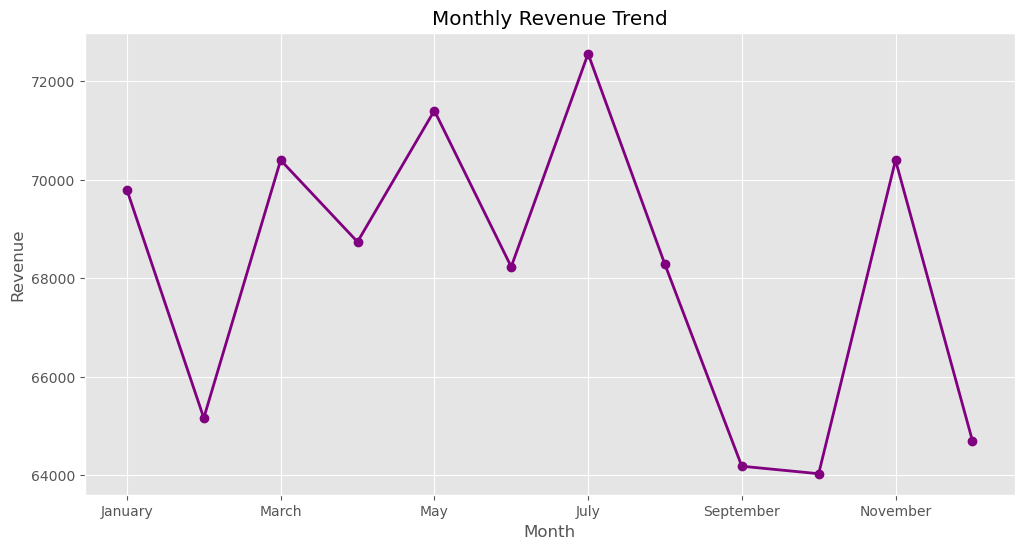

In [40]:
# To find Monthly Sales

df["month"] = df["date"].dt.month_name()
monthly_sales = df.groupby("month")["revenue"].sum().reindex([
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
])

plt.figure(figsize=(12,6))
monthly_sales.plot(marker="o", linewidth=2, color="purple")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

In [30]:
#Between May to July there was a spike of sales and the lowest sells was in December

## 10. Poor Performing Pizzas

In [43]:
#To find out Poor Performing Pizzas


low_sales = df.groupby("name")["revenue"].sum().sort_values(ascending=True).head(5)
low_sales

name
The Brie Carre Pizza         11588.50
The Green Garden Pizza       13955.75
The Spinach Supreme Pizza    15277.75
The Mediterranean Pizza      15360.50
The Spinach Pesto Pizza      15596.00
Name: revenue, dtype: float64

# Plot for Poorly Performing Pizzas

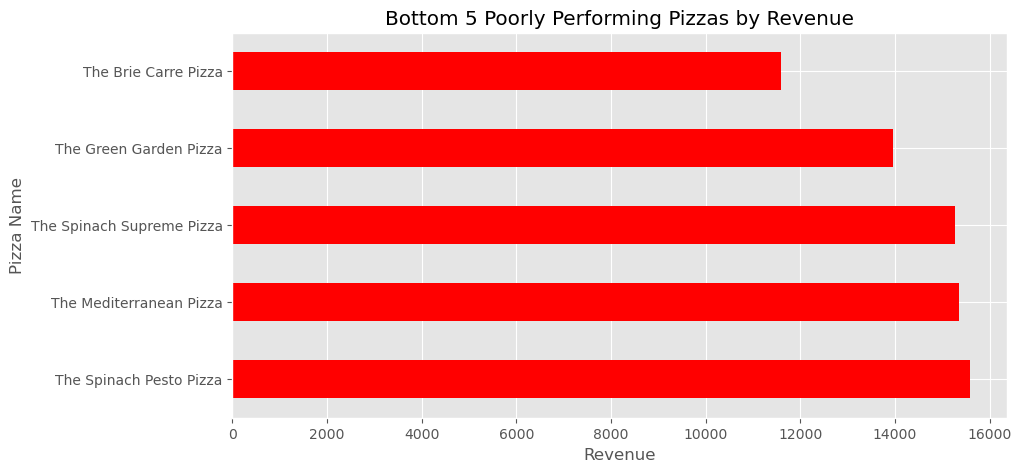

In [44]:
#Poorly Performing Pizzas
plt.figure(figsize=(10,5))
low_sales.plot(kind="barh", color="red")
plt.title("Bottom 5 Poorly Performing Pizzas by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Pizza Name")
plt.gca().invert_yaxis()  # optional: lowest at bottom, highest at top
plt.show()

These pizzas generated the lowest revenue, so the business might consider promotions or reviewing their menu placement.

# Top 5 Pizzas Vs Bottom 5 Pizzas
- Left = Top 5 pizzas by revenue

- Right = Bottom 5 pizzas by revenue

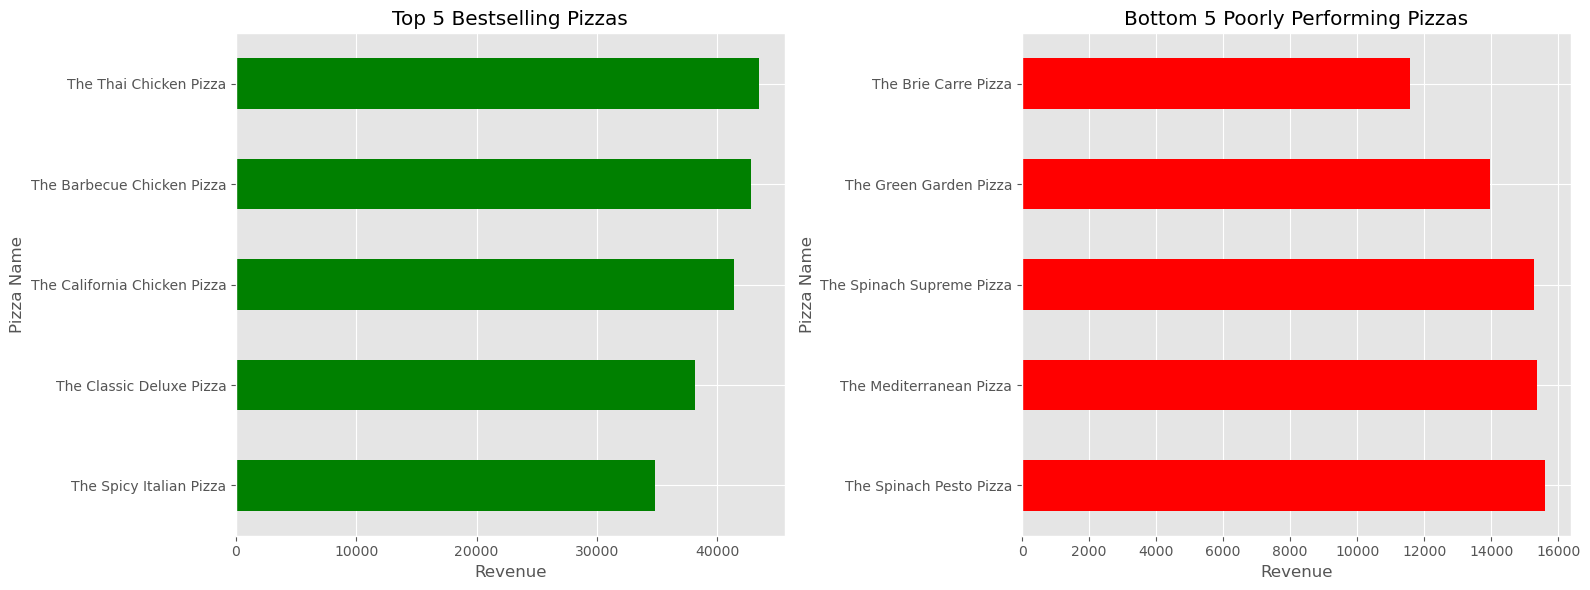

In [45]:
import matplotlib.pyplot as plt

# Top 5 pizzas
top_pizzas = df.groupby("name")["revenue"].sum().sort_values(ascending=False).head(5)

# Bottom 5 pizzas
bottom_pizzas = df.groupby("name")["revenue"].sum().sort_values(ascending=True).head(5)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Top 5 plot
top_pizzas.plot(kind="barh", color="green", ax=axes[0])
axes[0].invert_yaxis()  # highest at top
axes[0].set_title("Top 5 Bestselling Pizzas")
axes[0].set_xlabel("Revenue")
axes[0].set_ylabel("Pizza Name")

# Bottom 5 plot
bottom_pizzas.plot(kind="barh", color="red", ax=axes[1])
axes[1].invert_yaxis()
axes[1].set_title("Bottom 5 Poorly Performing Pizzas")
axes[1].set_xlabel("Revenue")
axes[1].set_ylabel("Pizza Name")

plt.tight_layout()
plt.show()

The left plot shows the top 5 pizzas generating the highest revenue, with the “Thai chicken Pizza” leading the chart.
The right plot shows the 5 pizzas generating the lowest revenue, suggesting potential candidates for promotion or menu review.
This side-by-side comparison helps management quickly see which items are performing well and which are underperforming.